In [38]:
import tensorflow as tf
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../data/mnist.npz"
print (path)

/Users/vikrant/SourceCode/python-personal/DeepLearningWithTF2/../data/mnist.npz


In [44]:
# GRADED FUNCTION: train_mnist
import matplotlib.pyplot as plt

def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('acc') > 0.99) :
                print("able to reach acceptable error")
                self.model.stop_training = True
    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    # YOUR CODE SHOULD START HERE
    #print(x_train[5])
    
    (x_train,x_test)=(x_train/255.0,y_train/255.0)
    plt.imshow(x_train[5])
    print("After normalization " , x_train[5])
    # YOUR CODE SHOULD END HERE
    callback = myCallback()
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512 , activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # YOUR CODE SHOULD START HERE
    
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])
    
    # model fitting
    history = model.fit(x_train,y_train,epochs=10 , callbacks = [callback])
    # model fitting
    #model.evaluate(x_test,y_test)
    model.summary()
    return history.epoch, history.history['acc'][-1]

After normalization  [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0

([0, 1, 2, 3, 4], 0.99156666)

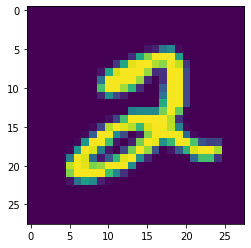

In [45]:
train_mnist()